# Task 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering as agc
from scipy.cluster.hierarchy  import dendrogram ,linkage




In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
alldatasets =[]
for i in range(1,9):
  df_data = pd.read_csv(f'Data{i}.csv')
  df_data.drop(columns=df_data.columns[0], axis=1, inplace=True)
  alldatasets.append(df_data)

## Hierarchical clustering

In [ ]:
def hierarchicalCluster(df):
  hc = agc(n_clusters = max(df['Class']), affinity = 'euclidean', linkage ='ward')
  return hc

In [ ]:
def hcPred(df,hc,dimension):
  if dimension ==  2:
    y_hc=hc.fit_predict(df.iloc[:,:2])
  else :
    y_hc=hc.fit_predict(df.iloc[:,:3])
  df['Clusters'] = y_hc
  return y_hc

In [ ]:
### Plot
def hc_plot(df,dimension):
  if dimension == 2:
    z = linkage(df.iloc[:,:2], 'ward')
  else:
    z = linkage(df.iloc[:,:3], 'ward')
  fig = plt.figure(plt.figure(figsize=(20,10)))
  plt.title
  dendrogram(z)

In [ ]:
def hierarchicalClustering(dataset,dimension):
  hc = hierarchicalCluster(dataset)
  hcPred(dataset,hc,dimension)
  plot  = hc_plot(dataset,dimension)
  return plot

In [ ]:
def dendrogramPlotHRC (datasetlist):
  i = 1
  for dataset in datasetlist:
    if i == 5 or i == 6:
      hierarchicalClustering(dataset,dimension=2)
    else:
      hierarchicalClustering(dataset,dimension=2)
    #print(f"Dendrogram Plot for DATA {i}:\n")
    i+=1

## Application of HRC

### Accuracy Score

In [ ]:
i = 1
for dataset in alldatasets:
  if i == 5 or i == 6:
    ypredict = hcPred(dataset,hierarchicalCluster(dataset),2) ### cluster prediction
  else:
    ypredict = hcPred(dataset,hierarchicalCluster(dataset),3) ### cluster prediction
  acc_score = accuracy_score(dataset.Class,ypredict)
  print(f"Accuracy score for DATA{i}:{acc_score * 100} %")
  i+=1


Accuracy score for DATA1:0.0 %
Accuracy score for DATA2:32.42574257425743 %
Accuracy score for DATA3:25.0 %
Accuracy score for DATA4:29.9 %
Accuracy score for DATA5:16.625 %
Accuracy score for DATA6:0.78125 %
Accuracy score for DATA7:13.116883116883116 %
Accuracy score for DATA8:0.0 %


### Plot

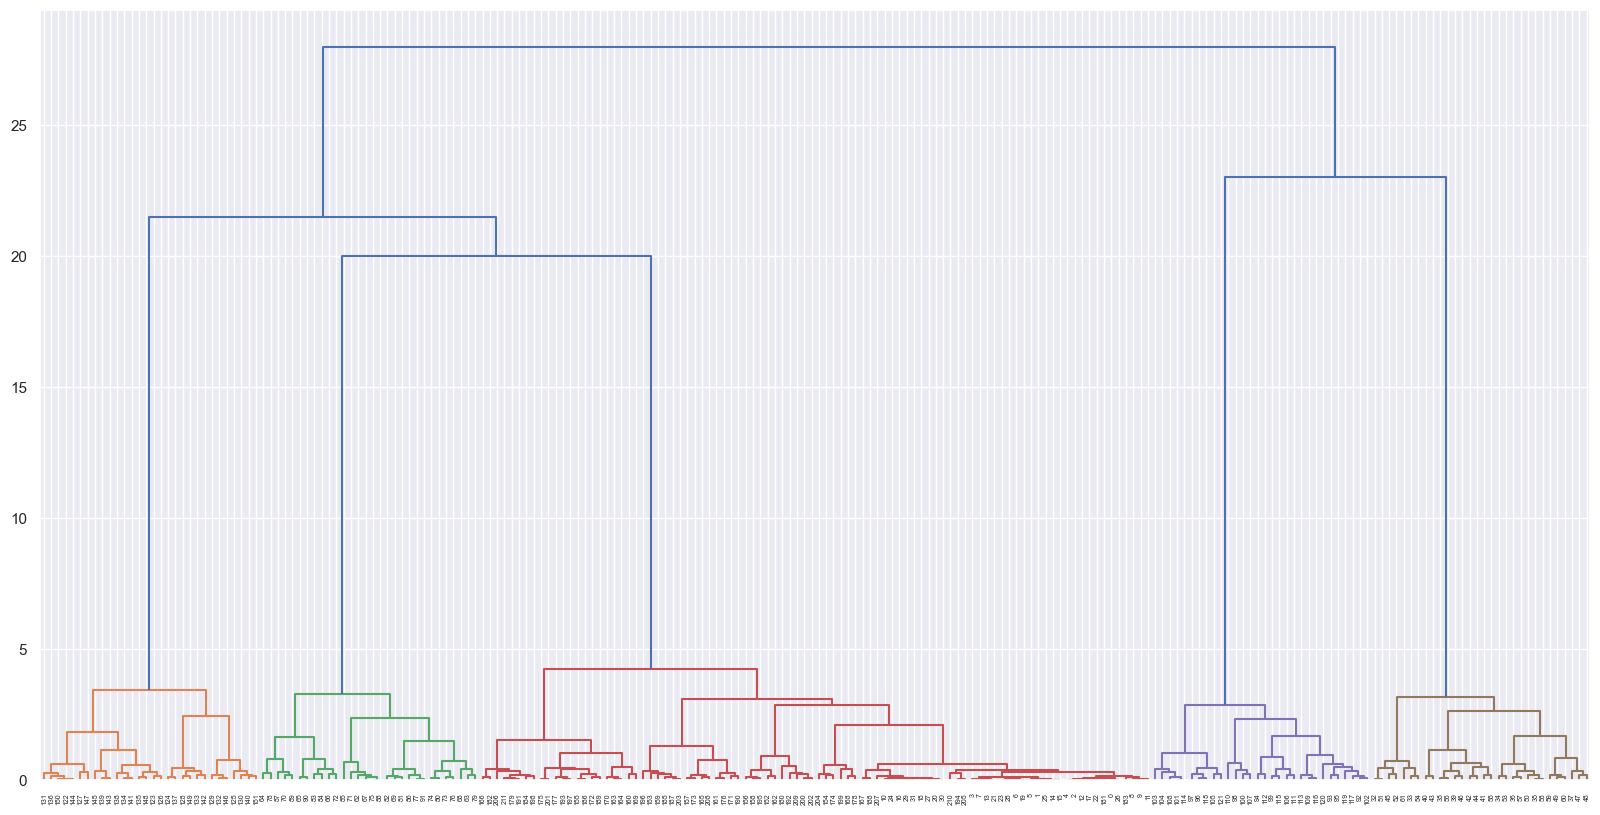

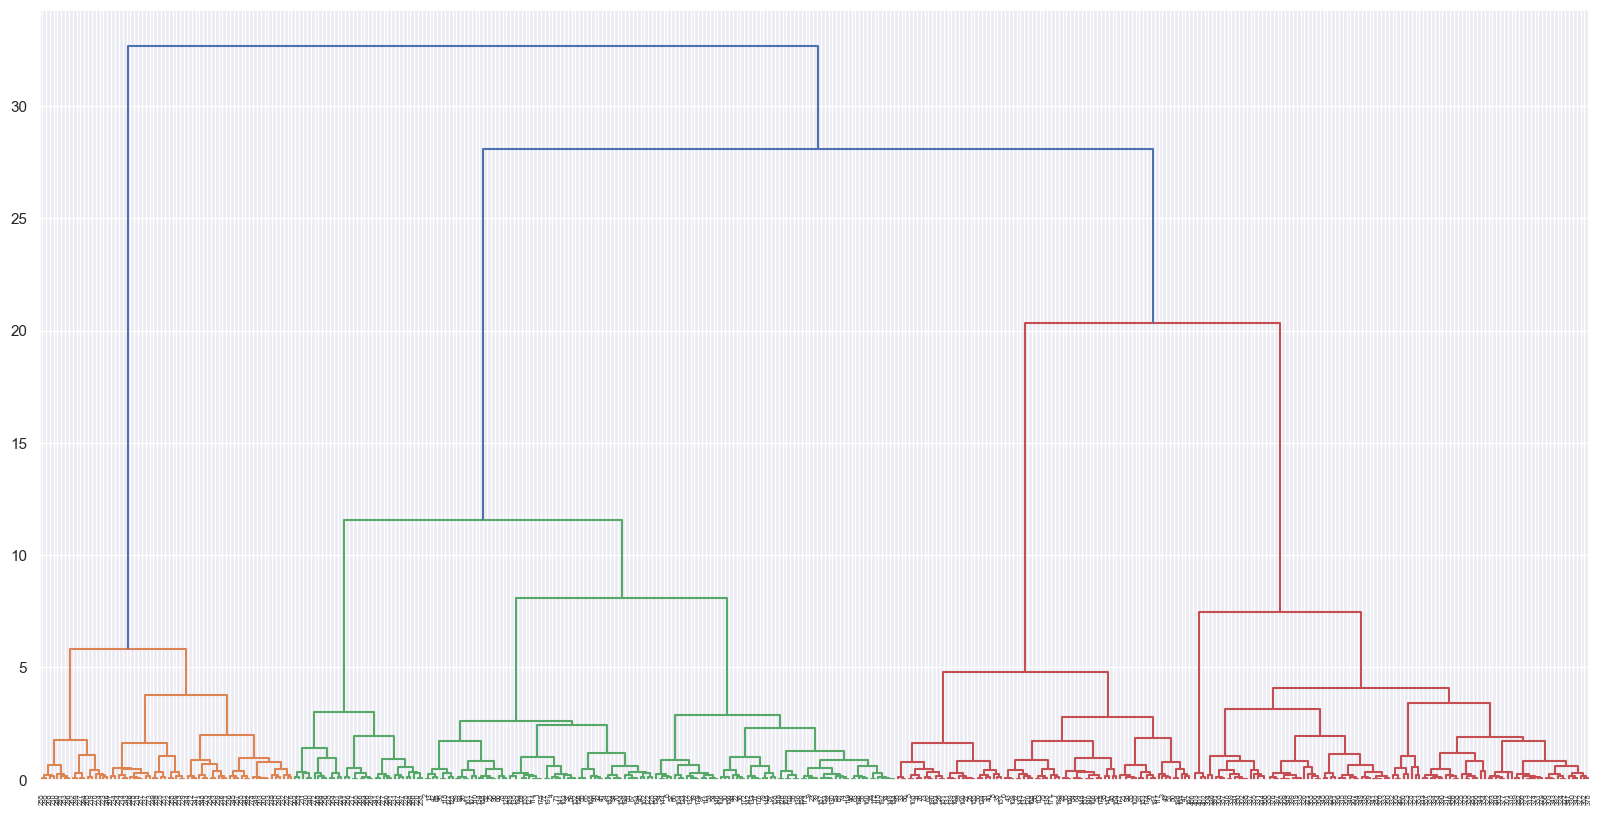

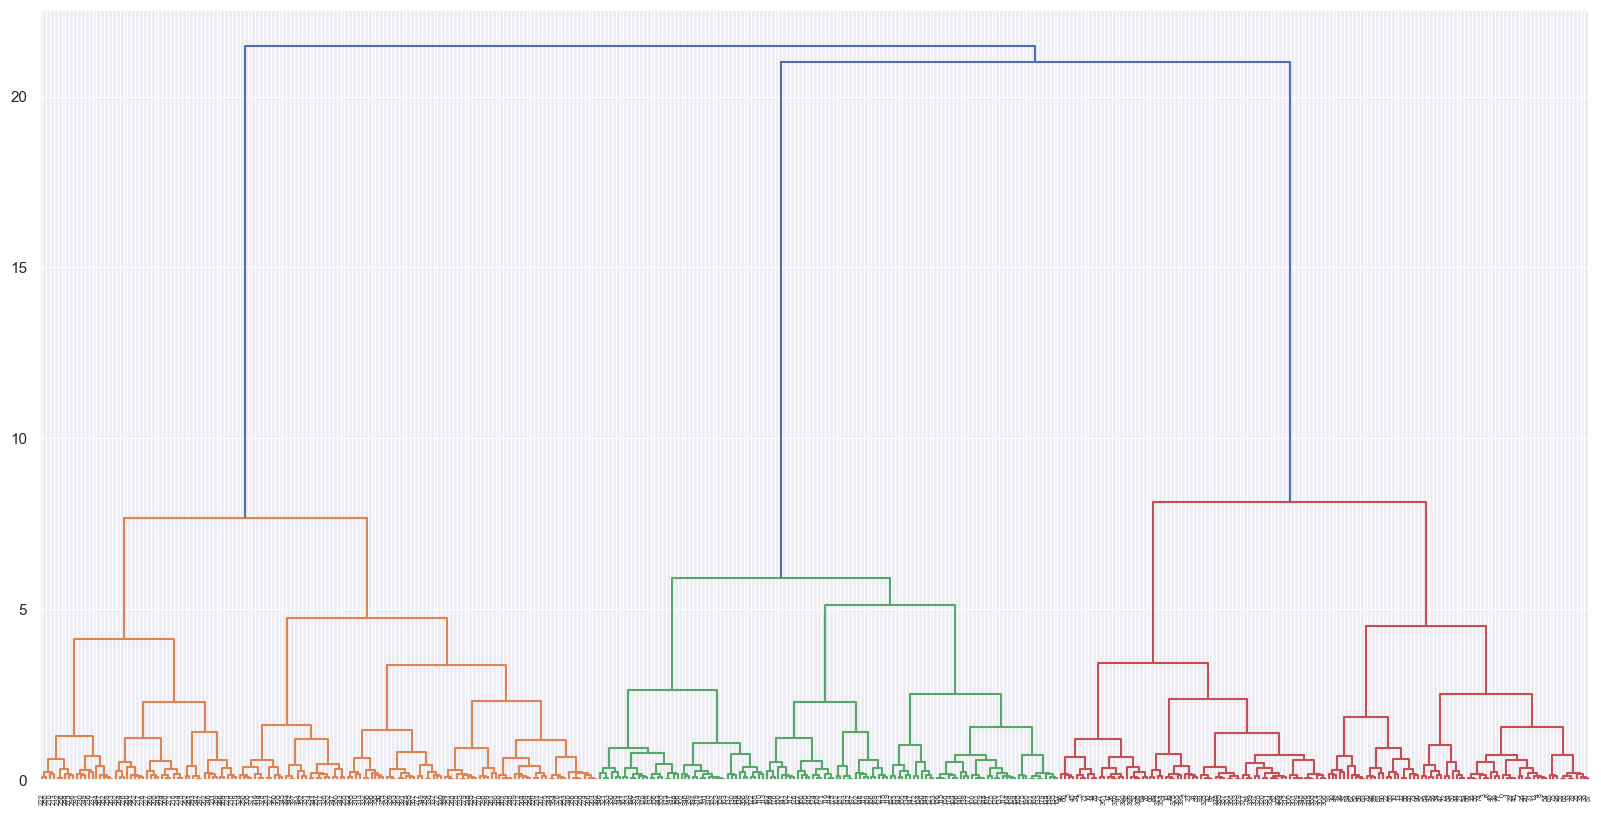

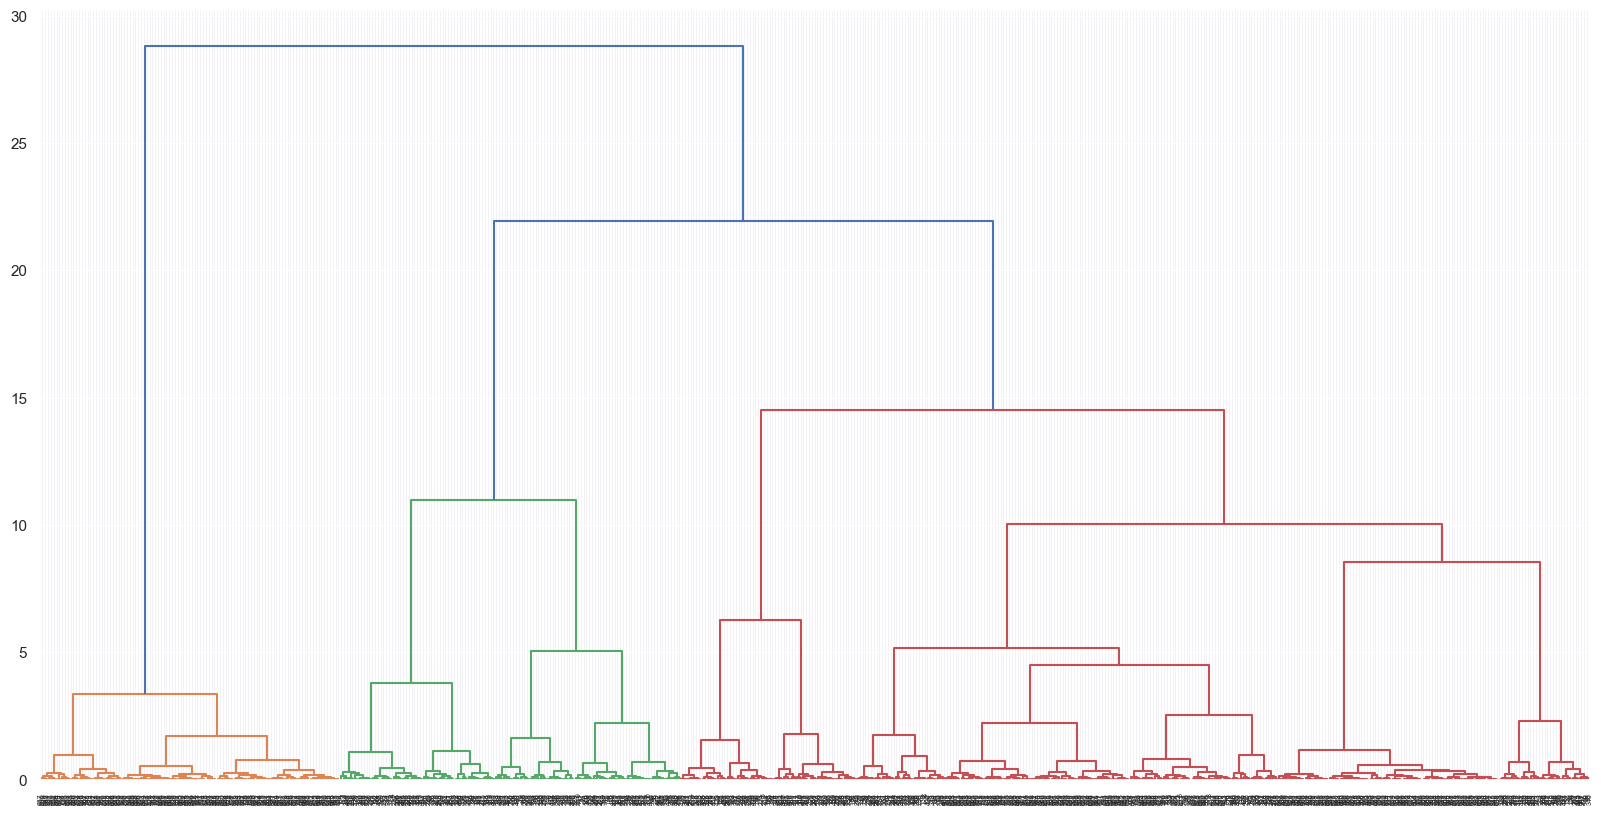

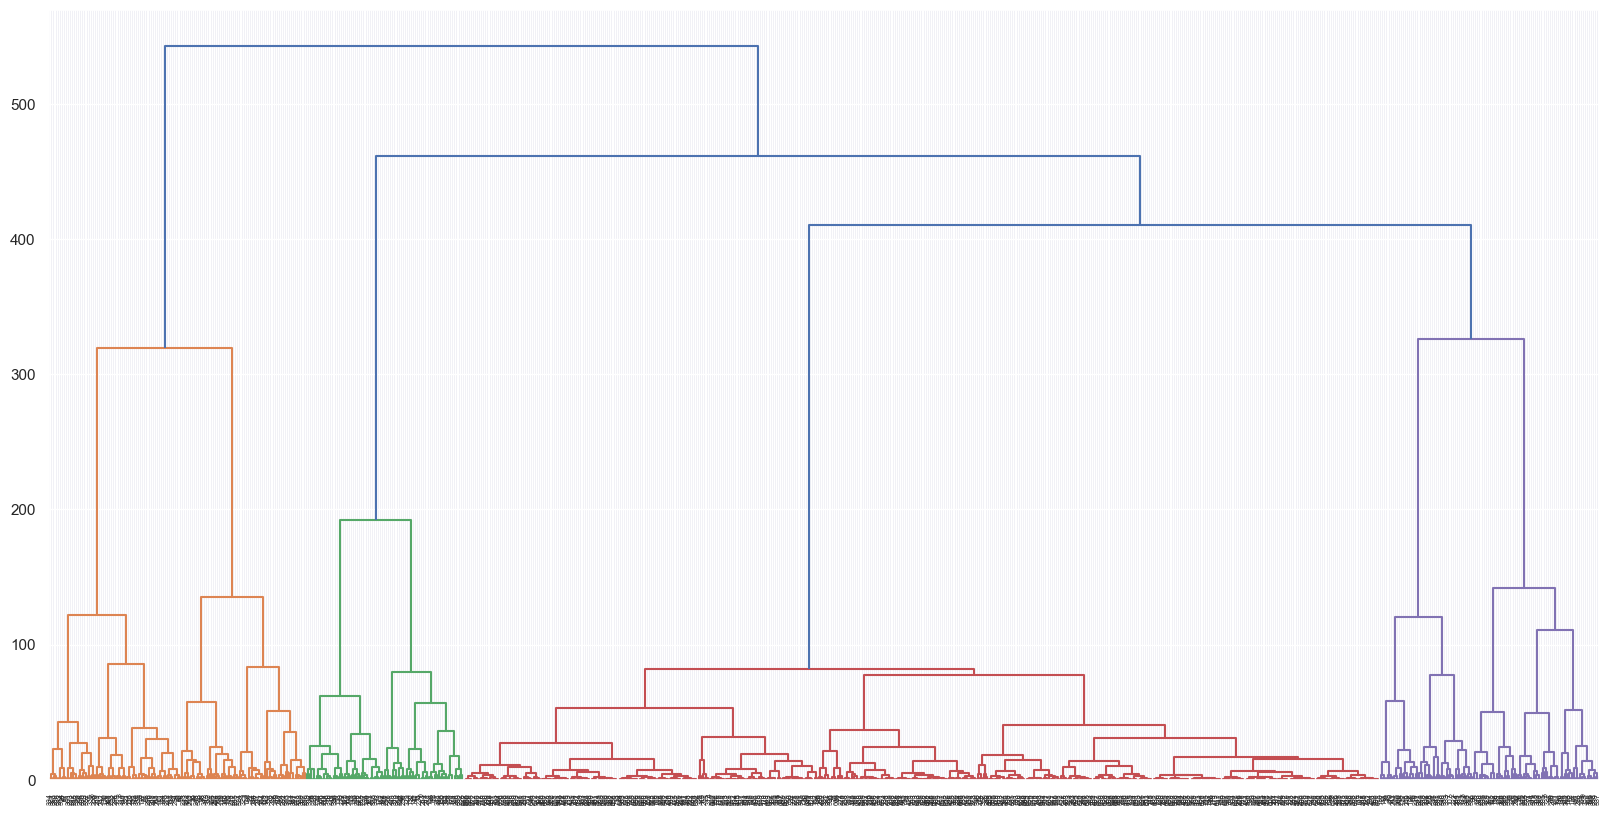

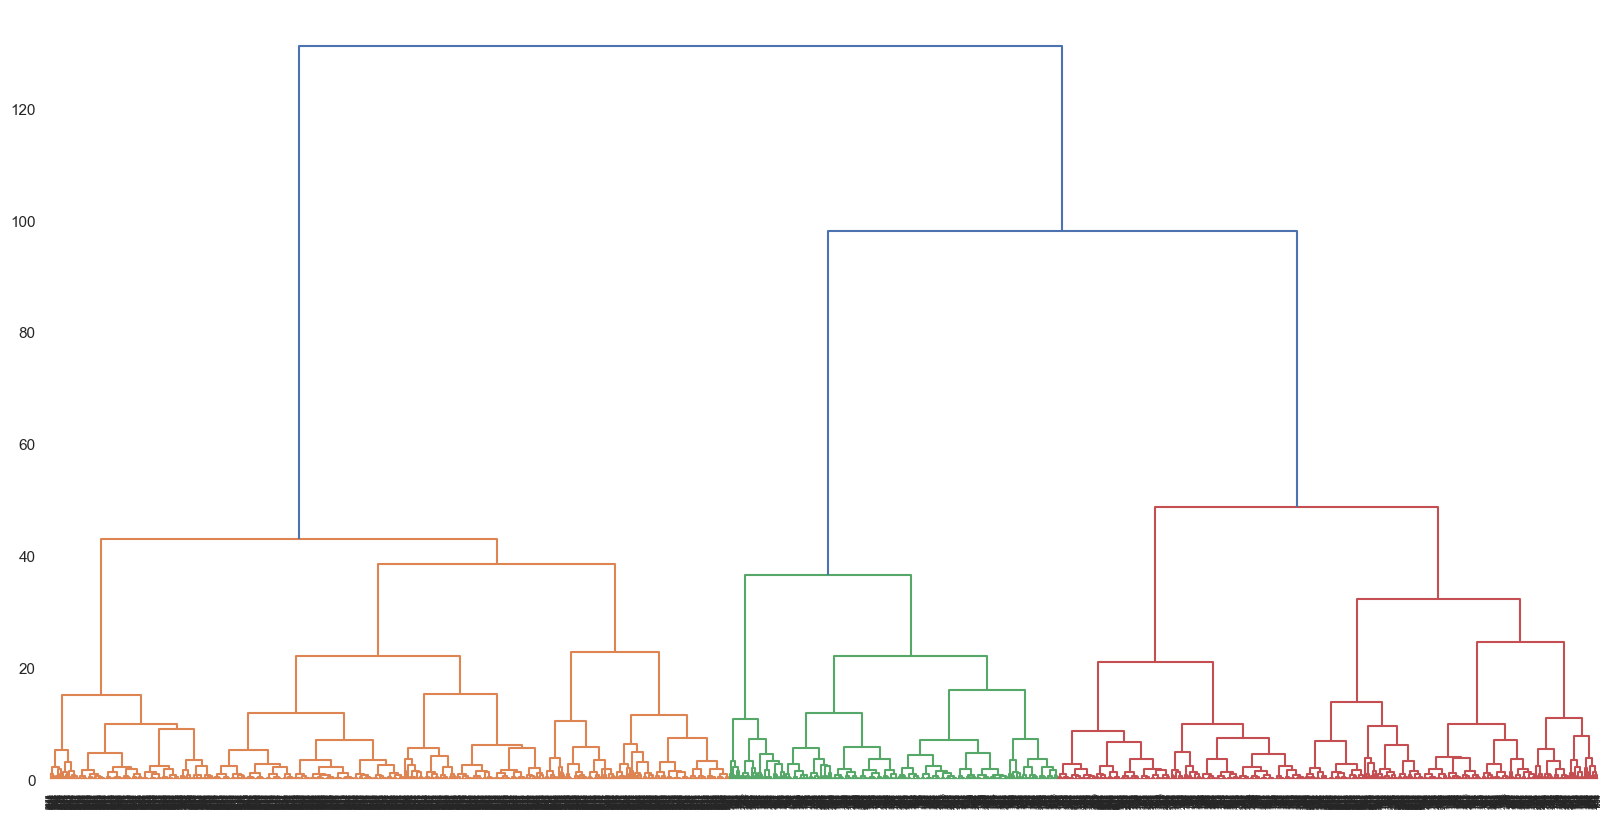

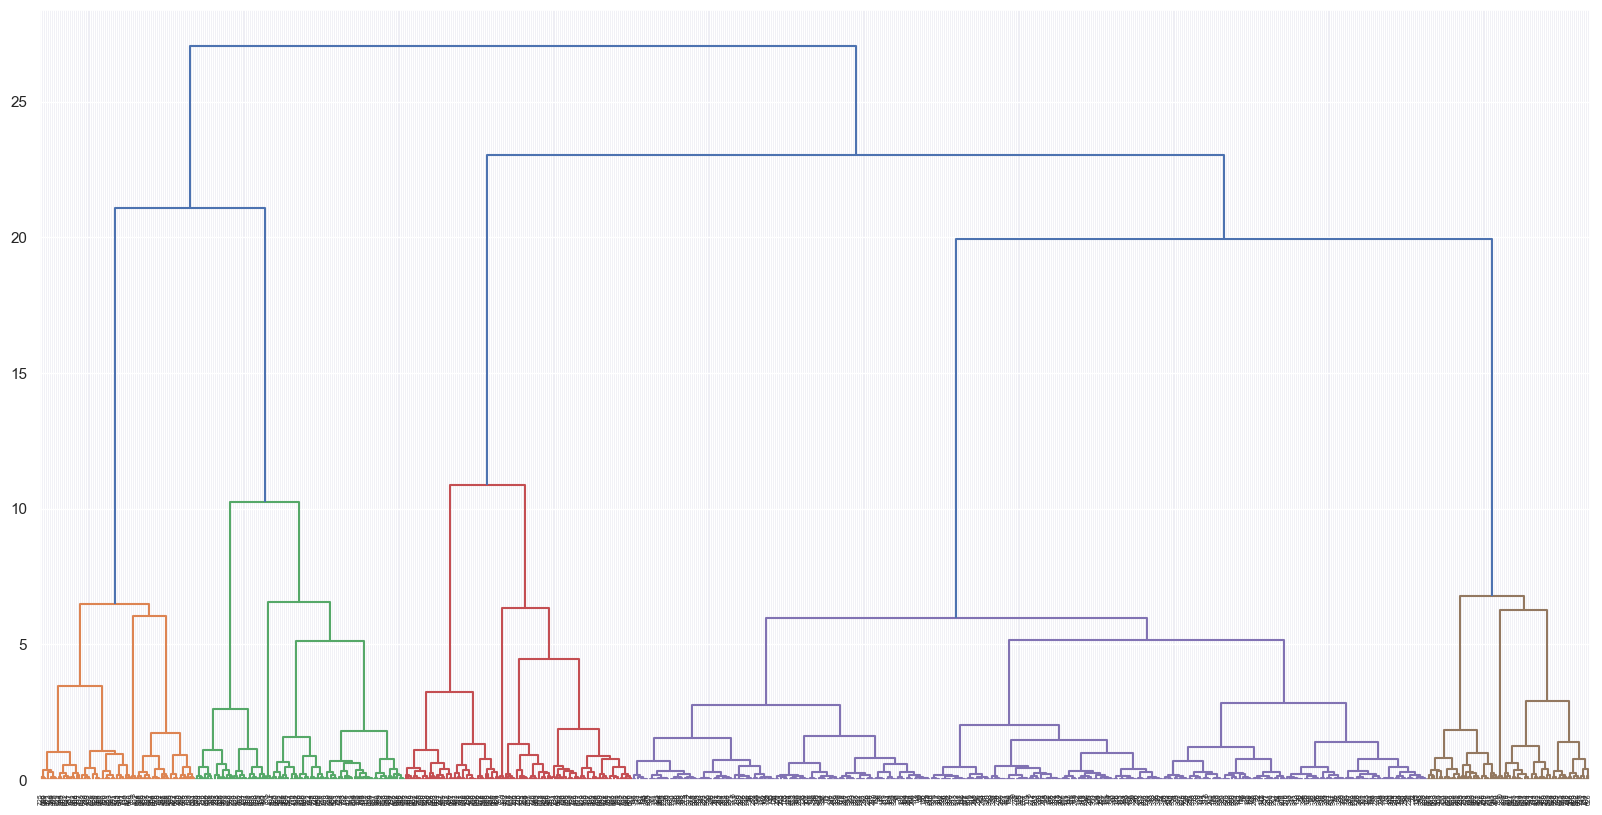

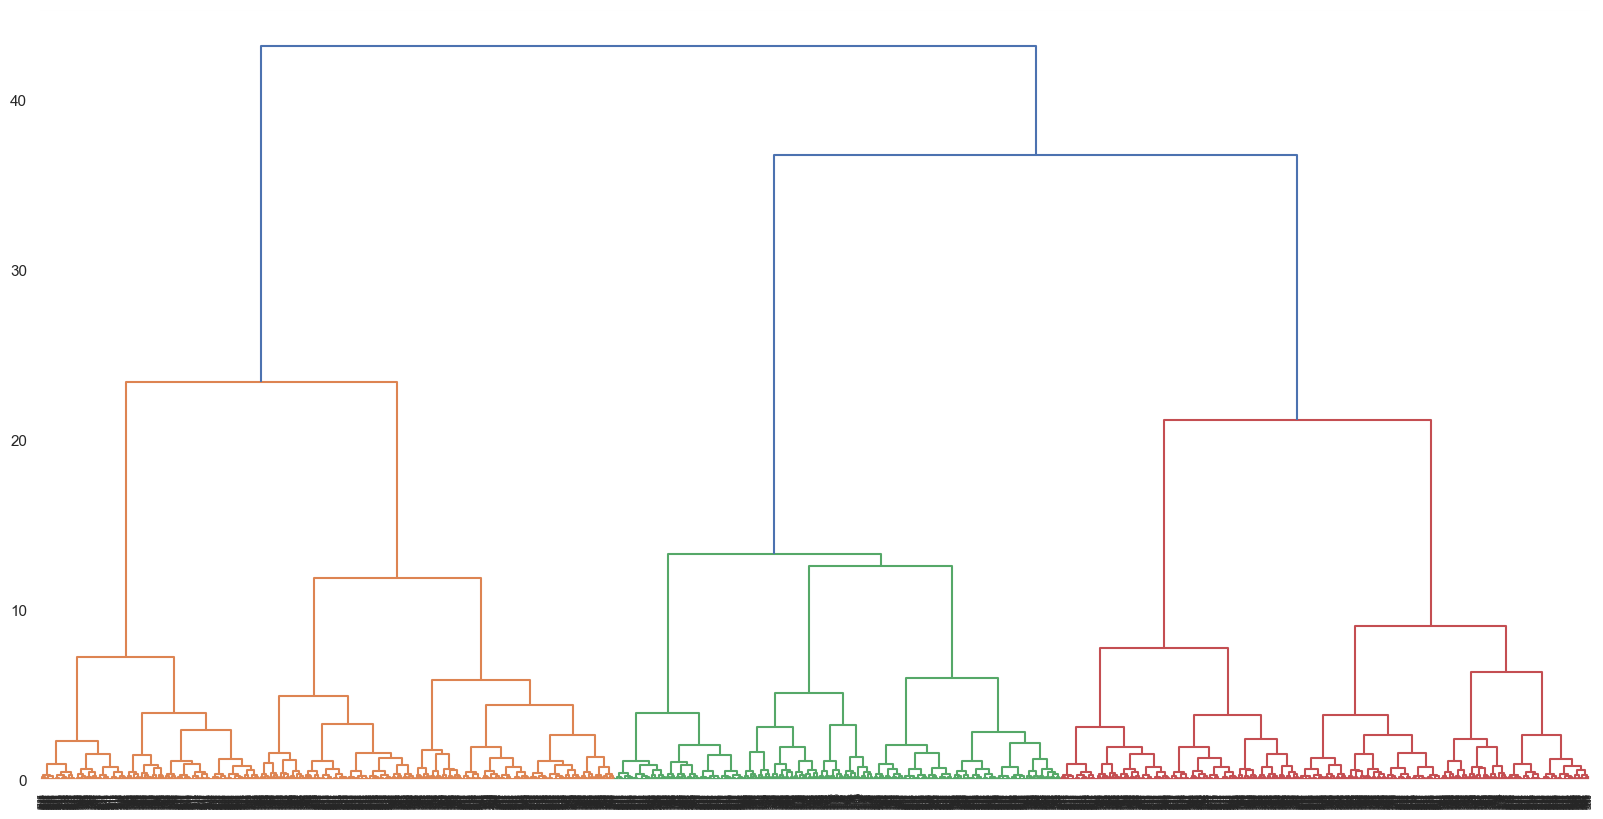

In [ ]:
dendrogramPlotHRC(alldatasets)

## K-means approach

In [ ]:
def kmeans(df):
# k-means
  kmeans = KMeans(n_clusters=max(df['Class']), random_state=0)
  return kmeans

cluster generator

In [ ]:
#plt.scatter(df_data1.iloc[:, 1],df_data1['Class'])


# def prediction(df,val):
#   result_predicted = val.fit_predict(df.iloc[:,0:3])
#   df['Clusters'] =result_predicted
#   return result_predicted

def prediction(df,val,dimension):
  if dimension == 2:
    result_predicted = val.fit_predict(df.iloc[:,0:2])
  else:
    result_predicted = val.fit_predict(df.iloc[:,0:3])
  df['Clusters'] =result_predicted
  return result_predicted

In [ ]:
print(prediction(alldatasets[5],kmeans(alldatasets[5]),2))

[1 1 1 ... 0 0 0]


Data frame lists

In [ ]:
def dataframeLists(df,var,clustervar):
  dflist = []
  if var != clustervar:
    limit = max(df[var])
  else: limit = max(df[var])+1
  for i in range(limit): 
    dfname = df[df[clustervar]==i]
    dflist.append(dfname)
  return dflist



### Plot

In [ ]:
def plotting(dataflist,dimension):

  fig = plt.figure(plt.figure(figsize=(5,5)))
  if dimension == 3:
    threedee = fig.add_subplot(projection='3d')
    for x in range(len(dataflist)):
        threedee.scatter(dataflist[x].iloc[:, 0], dataflist[x].iloc[:, 1], dataflist[x].iloc[:, 2])
        threedee.set_xlabel(dataflist[x].columns[0])
        threedee.set_ylabel(dataflist[x].columns[1])
        threedee.set_zlabel(dataflist[x].columns[2])
  else:
    twodee = fig.add_subplot()
    for x in range(len(dataflist)):
      twodee.scatter(dataflist[x].iloc[:, 0], dataflist[x].iloc[:, 1])
  plt.show()

In [ ]:
def kmeanscluster(dataset,var,clustervar,dimension):
  kmean = kmeans(dataset)
  prediction(dataset,kmean,dimension)
  dataflist = dataframeLists(dataset,var,clustervar)
  plotting(dataflist,dimension)

In [ ]:
#Scatter Plot
def scatterPlot(var):
  i = 0
  for dataset in alldatasets:
    if i == 5 or i == 6:
      kmeanscluster(dataset,"Class",var,dimension=2)
    else:
      kmeanscluster(dataset,"Class",var,dimension=3)
    i+=1

### Accuracy Score

In [ ]:
i = 1
for dataset in alldatasets:
  if i == 5 or i == 6:
    accscore = accuracy_score(dataset.Class,prediction(dataset,kmeans(dataset),2))
  else:
    accscore = accuracy_score(dataset.Class,prediction(dataset,kmeans(dataset),3))
  print(f"Accuracy score for DATA{i}:{accscore * 100} %")
  i+=1

Accuracy score for DATA1:14.150943396226415 %
Accuracy score for DATA2:5.9405940594059405 %
Accuracy score for DATA3:0.0 %
Accuracy score for DATA4:32.7 %
Accuracy score for DATA5:32.125 %
Accuracy score for DATA6:48.876953125 %
Accuracy score for DATA7:12.987012987012985 %
Accuracy score for DATA8:0.0 %


### Data Frame based on orginal class values

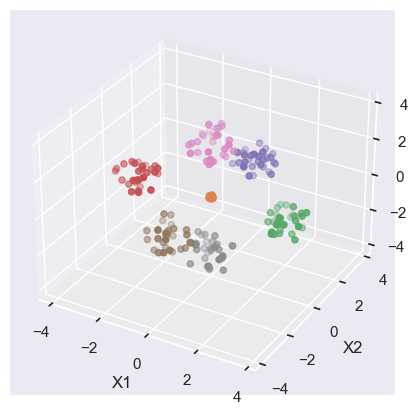

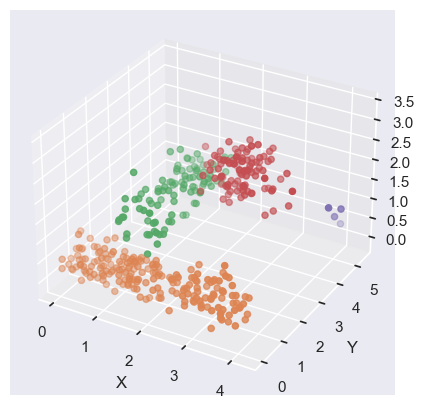

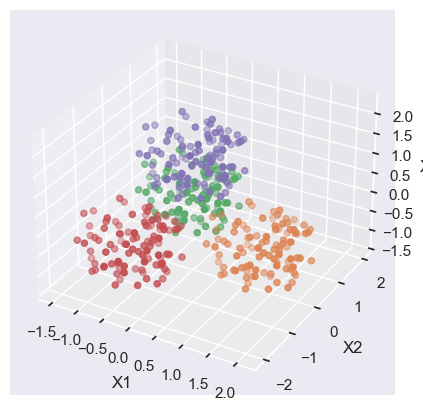

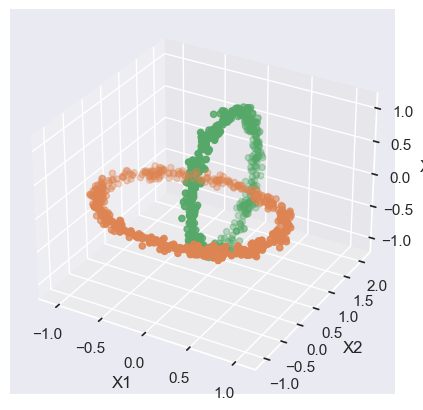

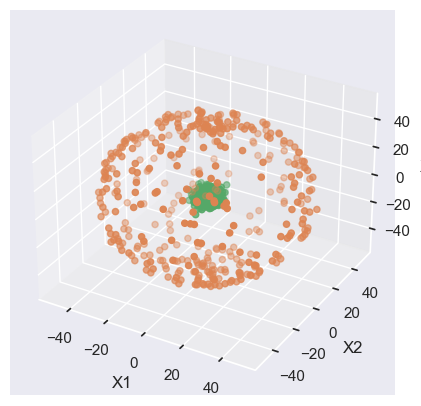

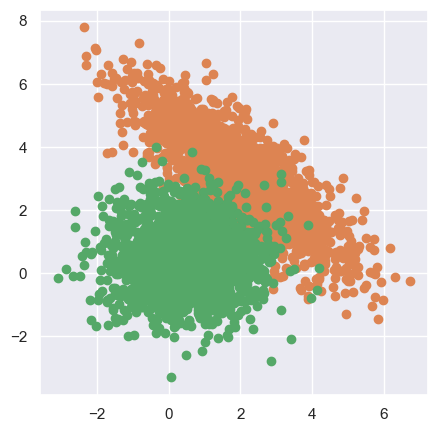

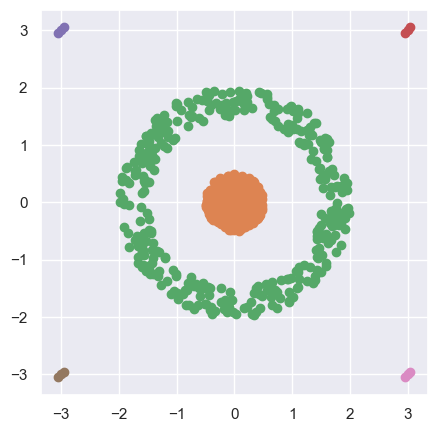

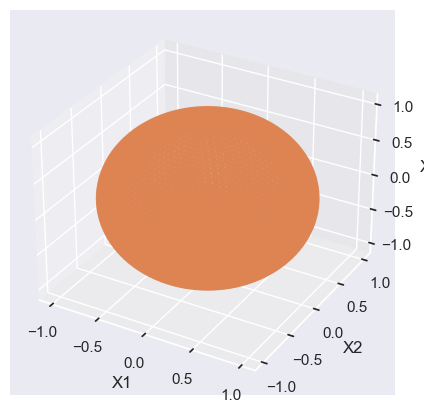

In [ ]:
scatterPlot("Class")

### Data Frame lists based on cluster values

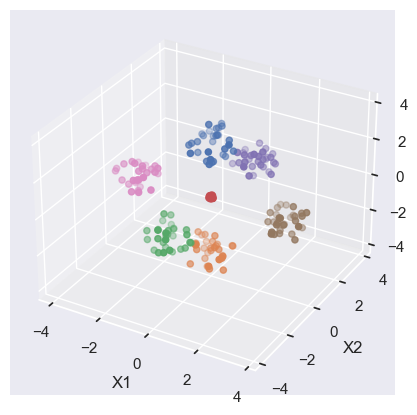

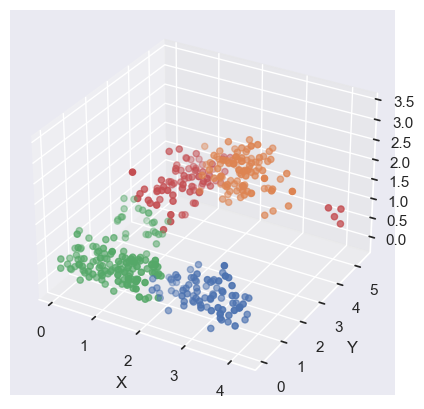

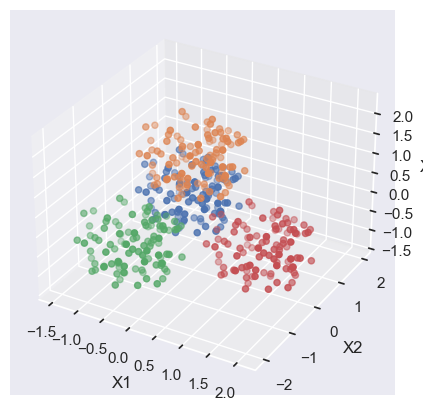

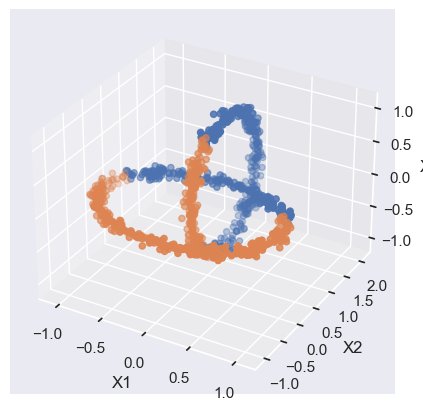

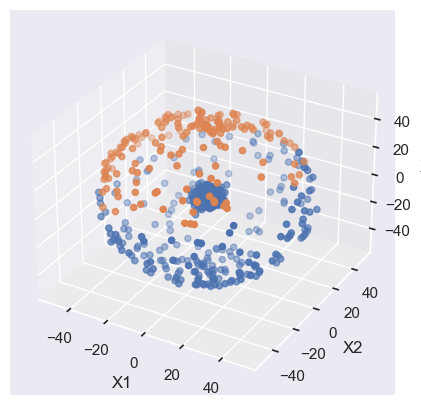

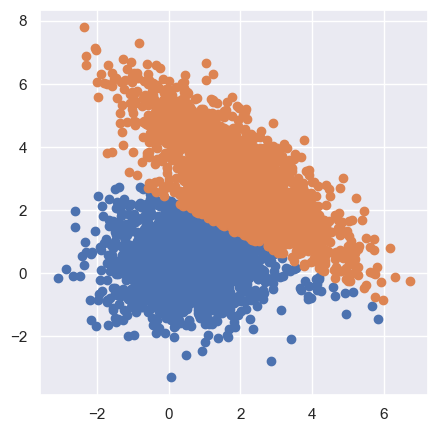

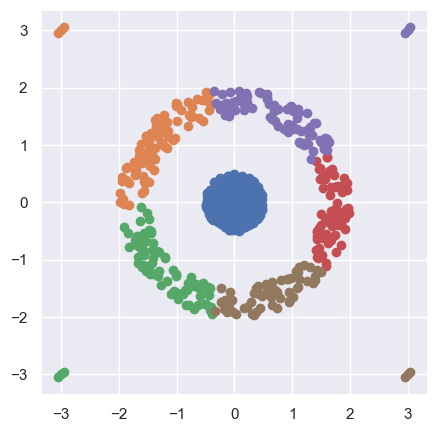

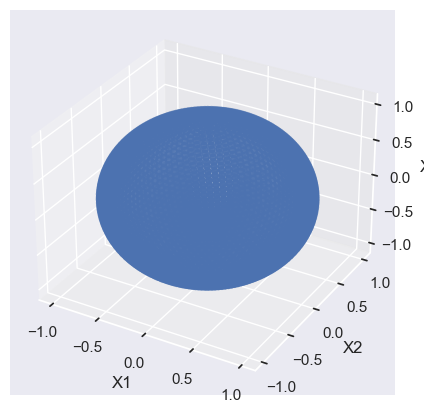

In [ ]:
scatterPlot("Clusters")

#Task 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix, confusion_matrix,accuracy_score,plot_roc_curve,f1_score, roc_auc_score, recall_score, precision_score





import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# plt.style.use('dark_background')
pd.pandas.set_option('display.max_columns',None)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving World Indicators.csv to World Indicators (2).csv


In [ ]:
df = pd.read_csv("World Indicators.csv")
df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [ ]:
df.isnull().sum() #checking for how many null values are present in each column

Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

In [ ]:
df['GDP'] = df['GDP'].str.replace('$','') #removing any extra characters present in the data for clean up
df['GDP'] = df['GDP'].str.replace(',','') #removing any extra characters present in the data for clean up
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace('$','') #removing any extra characters present in the data for clean up
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace(',','') #removing any extra characters present in the data for clean up
df['Business Tax Rate'] = df['Business Tax Rate'].str.replace('%','')

In [ ]:
df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,41852.0,199070864638,0.044,233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,13576.0,104115863405,0.034,178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,3761.0,7294900431,0.045,34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,2215.0,15292424757,0.052,404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,NaN,10395757480,0.064,39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [ ]:
df.shape

(208, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

In [ ]:
df['GDP'] = df['GDP'].astype('float64') #explicitly converting the data types
df['Health Exp/Capita'] = df['Health Exp/Capita'].astype('float64')
df['Business Tax Rate'] = df['Business Tax Rate'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    float64
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    float64
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    float64
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

In [ ]:
df.drop(['Region','Country'],axis=1).columns

Index(['Birth Rate', 'Business Tax Rate', 'Days to Start Business',
       'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita',
       'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Urban'],
      dtype='object')

In [ ]:
for col in df.drop(['Region','Country'],axis=1).columns: #replacing the NULL values with a value specified in each column 
    df[col].fillna(df[col].median(),inplace=True)

In [ ]:
df.isnull().sum()

Birth Rate                0
Business Tax Rate         0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Urban          0
Region                    0
Country                   0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth Rate,208.0,2.163942e-02,1.050005e-02,8.000000e-03,1.300000e-02,1.900000e-02,2.800000e-02,5.000000e-02
Business Tax Rate,208.0,4.388462e+01,3.361755e+01,8.400000e+00,3.187500e+01,3.880000e+01,4.605000e+01,3.391000e+02
Days to Start Business,208.0,2.873077e+01,5.292849e+01,1.000000e+00,1.000000e+01,1.800000e+01,3.200000e+01,6.940000e+02
Energy Usage,208.0,6.656858e+04,2.548929e+05,7.650000e+02,1.041350e+04,1.808200e+04,2.707650e+04,2.727728e+06
GDP,208.0,3.430775e+11,1.332070e+12,1.707000e+08,8.634592e+09,2.698363e+10,1.699945e+11,1.553380e+13
Health Exp % GDP,208.0,6.710096e-02,2.684405e-02,1.700000e-02,4.975000e-02,6.500000e-02,8.025000e-02,1.770000e-01
Health Exp/Capita,208.0,1.007832e+03,1.790880e+03,1.200000e+01,1.012500e+02,3.110000e+02,8.360000e+02,9.908000e+03
Hours to do Tax,208.0,2.718413e+02,2.311914e+02,1.200000e+01,1.640000e+02,2.240000e+02,3.037500e+02,2.600000e+03
Infant Mortality Rate,208.0,2.625000e-02,2.433393e-02,2.000000e-03,8.000000e-03,1.600000e-02,3.900000e-02,1.120000e-01
Internet Usage,208.0,3.778846e-01,2.778304e-01,0.000000e+00,1.000000e-01,4.000000e-01,6.000000e-01,9.000000e-01


In [ ]:
df1_original = df.copy()

In [ ]:
df.drop(['Region','Country'],axis=1,inplace=True)

In [ ]:
## Using Zscore for scaling/standardisation to bring into specific scale
df_scaled=df.apply(zscore)
df_scaled.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.320826,0.838348,-0.070657,-0.097202,-0.108368,-0.862638,-0.433698,0.776806,-0.133881,-1.002608,-0.575290,-0.093478,0.099836,-0.146007,-0.138917,0.641373,-0.562334,0.434133
1,2.325642,0.244967,0.705842,-0.208403,-0.179824,-1.236058,-0.464483,0.044046,3.326418,-1.002608,1.129409,-2.027646,-2.104366,-1.102524,1.850810,-2.015062,-1.013408,-0.691160
2,1.466435,0.656458,0.005099,-0.247002,-0.252684,-0.825296,-0.545085,-0.007984,1.390298,-1.363409,-0.164900,-1.315058,-1.176281,-0.385136,1.414040,-1.431230,-0.915348,-0.633453
3,0.225358,-0.727104,0.592208,-0.253082,-0.246666,-0.563901,-0.337984,-0.519615,0.525224,-1.002608,-0.101763,-2.740234,-2.452398,1.288769,0.521090,-0.175992,-0.797677,-0.048136
4,1.943772,-0.011469,-0.297925,-0.190682,-0.250350,-0.115796,-0.542286,-0.007984,1.719851,-1.363409,-0.164900,-1.722251,-1.524313,-1.102524,1.666396,-1.752337,-0.993796,-1.284722


In [ ]:
df.shape

(208, 18)

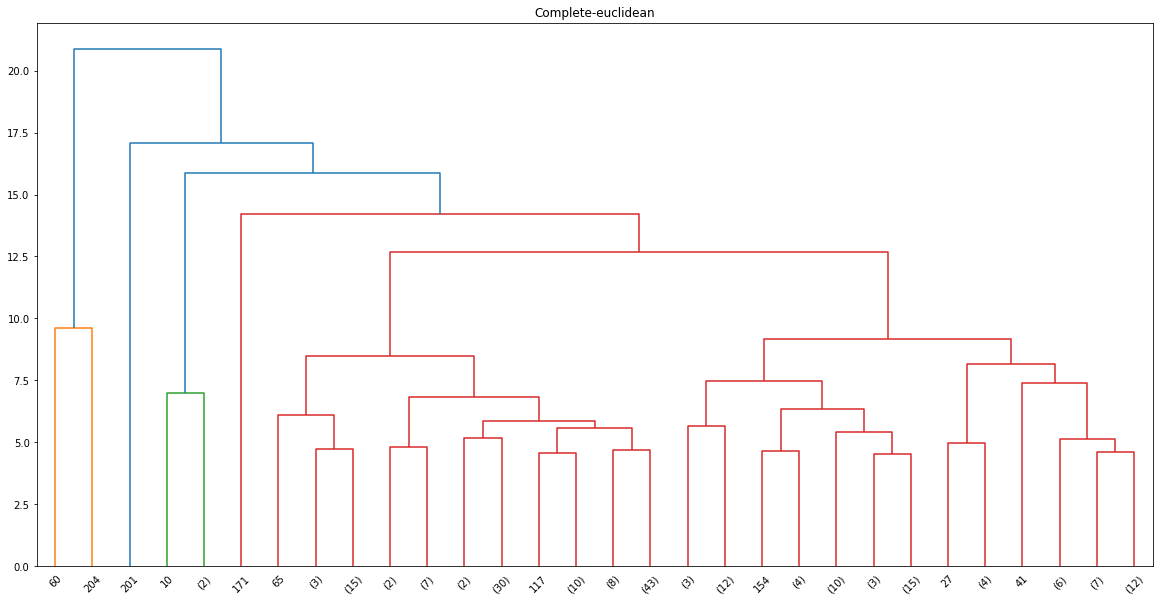

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Complete-euclidean')
hclust = linkage(df_scaled, method = 'complete',metric='euclidean')
dend = dendrogram(hclust,truncate_mode='lastp',p=30)

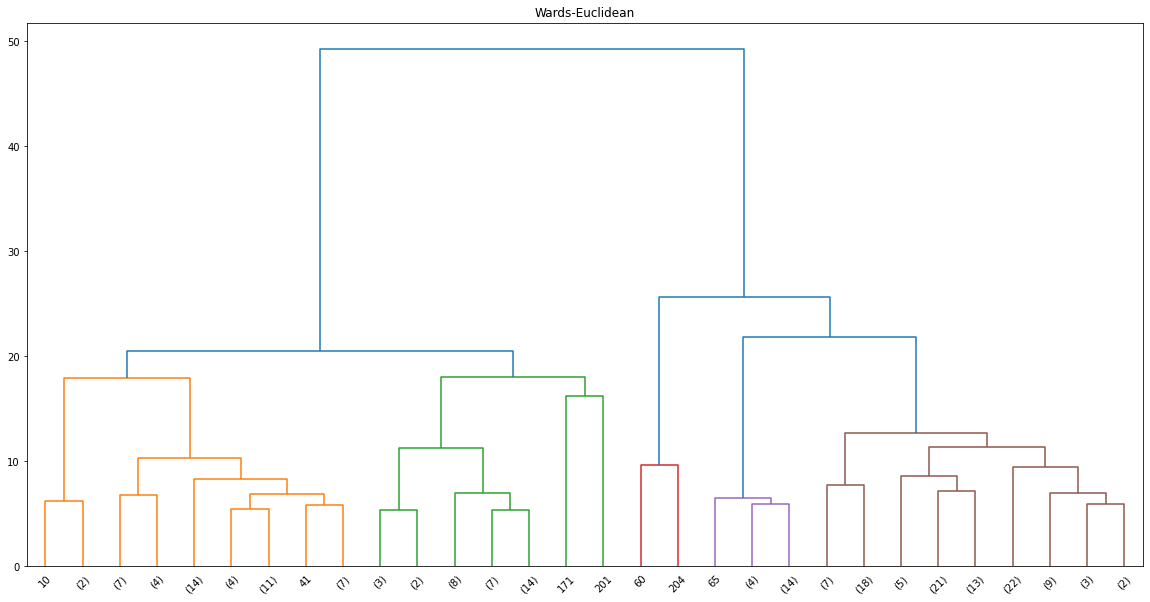

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Wards-Euclidean')
hclust = linkage(df_scaled, method = 'ward',metric='euclidean')
dend = dendrogram(hclust,truncate_mode='lastp',p=30,color_threshold=20)

In [ ]:
link_method = linkage(df, method = 'ward') #using wards linkage provide the link method
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'. Baiscally gives the cluster labels for each observation

clusters = fcluster(link_method, 3, criterion='maxclust')


In [ ]:
df1_original['clusters'] = clusters #add the cluster numbers in the original data frame
df1_original.head()
df1_original['clusters'].value_counts() #number of records belonging to each cluster

1    193
2     14
3      1
Name: clusters, dtype: int64

In [ ]:
cluster_ = AgglomerativeClustering(n_clusters=3, 
                                  affinity='euclidean', 
                                  linkage='ward')
Cluster_agglo=cluster_.fit_predict(df)
print(Cluster_agglo)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2]


In [ ]:
df1_original['Agglo_Cluster'] = Cluster_agglo

In [ ]:
df1_original.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,clusters,Agglo_Cluster
0,0.025,72.0,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,1,2
1,0.046,52.1,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola,1,2
2,0.037,65.9,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,0.106,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin,1,2
3,0.024,19.5,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,1,2
4,0.042,43.5,13.0,18082.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,0.106,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,1,2


In [ ]:
aggdata1=df1_original.drop(['Region','Country','clusters'],axis=1).groupby('Agglo_Cluster').mean()
aggdata1['Agglo_Freq']=df1_original.drop(['Region','Country','clusters'],axis=1).Agglo_Cluster.value_counts()
aggdata1

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Agglo_Freq
Agglo_Cluster,,,,,,,,,,,,,,,,,,,
0,0.012500,49.685714,23.214286,4.861887e+05,2.682204e+12,0.084500,2919.285714,398.500000,0.009143,0.628571,0.092143,81.142857,75.642857,1.042857,0.185571,0.674286,0.139929,0.745214,14
1,0.013000,46.500000,5.000000,2.191193e+06,1.553380e+13,0.177000,8467.000000,187.000000,0.006000,0.700000,0.033000,81.000000,76.000000,0.900000,0.197000,0.669000,0.133000,0.809000,1
2,0.022347,43.450259,29.253886,2.512139e+04,9.469150e+10,0.065269,830.528497,263.093264,0.027596,0.358031,0.118642,72.279793,67.554404,0.955440,0.294083,0.634192,0.070715,0.563249,193


In [ ]:
df1_original['Agglo_Cluster'].value_counts()

2    193
0     14
1      1
Name: Agglo_Cluster, dtype: int64

In [ ]:
#Calinski-Harabasz Index for internal validation
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [ ]:
metrics.calinski_harabasz_score(df_scaled, clusters)

14.870774421618831

In [ ]:
#Dunn index for internal validation

In [ ]:
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from validclust import dunn #referred from lecture notes
from sklearn.metrics import pairwise_distances
dist_cohesive = pairwise_distances(df_scaled.iloc[:,0:17])
#print(dist_cohesive)
dunn_cohesive = dunn(dist_cohesive, clusters)
#print(dunn_cohesive)
print('DI Cohesive : '+ str(dunn_cohesive))

DI Cohesive : 0.08311431505994332


In [ ]:
dunnindex = []
k=2
while k<11:
  mydata =AgglomerativeClustering(n_clusters=k, 
                                  affinity='euclidean', 
                                  linkage='ward')
  mydata.fit(df1_original.iloc[:,0:17])
  dist_cohesive = pairwise_distances(df_scaled.iloc[:,0:18])
  dunn_cohesive = dunn(dist_cohesive,  mydata.labels_)
  dunnindex.append(dunn_cohesive)
  k=k+1


In [ ]:
dunnindex

[0.5502207857568944,
 0.08401386429667775,
 0.08401386429667775,
 0.08401386429667775,
 0.0634611848057535,
 0.0634611848057535,
 0.0634611848057535,
 0.04836229171387774,
 0.04836229171387774]

In [ ]:
#for countries of Cluster 0: list(df1_original.groupby('Agglo_cluster')['Country'].unique()[0])
#for countries of Cluster 0: list(df1_original.groupby('Agglo_cluster')['Country'].unique()[1])
#for countries of Cluster 2: list(df1_original.groupby('Agglo_cluster')['Country'].unique()[2])


In [ ]:
print("Countries belonging to cluster 0 are")
data=list(df1_original.groupby('Agglo_Cluster')['Country'].unique()[0])
data

Countries belonging to cluster 0 are


['China',
 'India',
 'Japan',
 'Korea, Rep.',
 'France',
 'Germany',
 'Italy',
 'Russian Federation',
 'Spain',
 'United Kingdom',
 'Australia',
 'Brazil',
 'Canada',
 'Mexico']

In [ ]:
print("Countries belonging to cluster 1 are")
data=list(df1_original.groupby('Agglo_Cluster')['Country'].unique()[1])
data

Countries belonging to cluster 1 are


['United States']

In [ ]:
print("Countries belonging to cluster 2 are")
data=list(df1_original.groupby('Agglo_Cluster')['Country'].unique()[2])
data

Countries belonging to cluster 2 are


['Algeria',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Djibouti',
 'Egypt, Arab Rep.',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Gabon',
 'Gambia, The',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Sao Tome and Principe',
 'Senegal',
 'Seychelles',
 'Sierra Leone',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Swaziland',
 'Tanzania',
 'Togo',
 'Tunisia',
 'Uganda',
 'Zambia',
 'Zimbabwe',
 'Afghanistan',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Bhutan',
 'Brunei Darussalam',
 'Cambodia',
 'Georgia',
 'Hong Kong SAR, China',
 'Indonesia',
 'Kazakhstan',
 'Korea, Dem. Rep.',
 'Kyrgyz Republic',
 'Lao PDR',
 'Macao SAR, China',
 'Malaysia',
 'Maldives',
 'M

In [ ]:
#k-means

In [ ]:
for n in range(2,11):
    k_means = KMeans(n_clusters = n,random_state=1)
    k_means.fit(df_scaled)
    print('For n = {}'.format(n))
    print(k_means.inertia_)
    print('-----------------------')

For n = 2
2488.306126195421
-----------------------
For n = 3
2152.56671219333
-----------------------
For n = 4
1857.8935600588024
-----------------------
For n = 5
1683.7285875871914
-----------------------
For n = 6
1527.611795792996
-----------------------
For n = 7
1440.1523692193841
-----------------------
For n = 8
1250.7565918166529
-----------------------
For n = 9
1153.3557398858807
-----------------------
For n = 10
1110.1505566372152
-----------------------


In [ ]:
wss=[]
for n in range(1,11):
    KM = KMeans(n_clusters=n,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

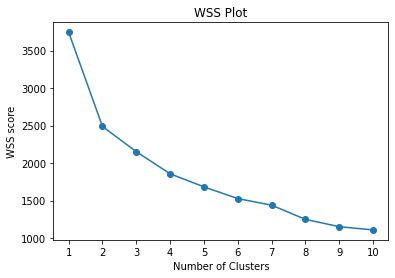

In [ ]:
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Number of Clusters')
plt.ylabel('WSS score')
plt.title('WSS Plot')
plt.plot(range(1,11), wss, marker = 'o');

In [ ]:
#Plotting silhoutte scores for different cluster values
ss = []
for k in range(2,11):
    sil_km = KMeans(n_clusters=k, random_state=1)
    sil_km.fit(df_scaled)
    labels = sil_km.labels_
    ss.append(round(silhouette_score(df_scaled,labels),2))
    
ss

[0.34, 0.28, 0.23, 0.21, 0.21, 0.17, 0.22, 0.18, 0.18]

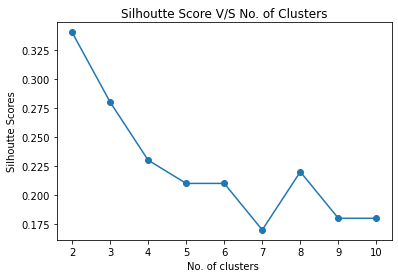

In [ ]:
plt.plot(range(2,11),ss,marker ='o')
plt.title('Silhoutte Score V/S No. of Clusters')
plt.xlabel('No. of clusters ')
plt.ylabel('Silhoutte Scores');

In [ ]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)

KMeans(n_clusters=3, random_state=1)

In [ ]:
labels = k_means.labels_

In [ ]:
labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [ ]:
df1_original['K_means_labels'] = labels
df1_original.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,clusters,Agglo_Cluster,K_means_labels
0,0.025,72.0,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,1,2,0
1,0.046,52.1,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola,1,2,1
2,0.037,65.9,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,0.106,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin,1,2,1
3,0.024,19.5,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,1,2,1
4,0.042,43.5,13.0,18082.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,0.106,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,1,2,1


In [ ]:
aggdata2=df1_original.drop(['clusters','Agglo_Cluster'],axis=1).groupby('K_means_labels').mean()
aggdata2['K_means_labels']=df1_original.K_means_labels.value_counts()
aggdata2

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,K_means_labels
K_means_labels,,,,,,,,,,,,,,,,,,,
0,0.016376,39.768807,27.706422,39007.412844,1.510648e+11,0.062807,608.431193,276.532110,0.013908,0.462385,0.107954,77.623853,71.779817,1.150459,0.239404,0.677422,0.081440,0.656174,109
1,0.033718,51.161972,36.535211,29452.422535,5.833639e+10,0.061944,124.295775,304.281690,0.054056,0.092958,0.145099,61.633803,58.563380,0.595775,0.403592,0.561901,0.034549,0.367930,71
2,0.011500,41.453571,12.928571,267976.214286,1.812578e+12,0.096893,4803.035714,171.321429,0.003786,0.771429,0.076857,83.214286,78.250000,1.150000,0.171536,0.670500,0.157500,0.796536,28


In [ ]:
#Calinski-Harabasz Index
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [ ]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
metrics.calinski_harabasz_score(df_scaled, labels)

75.78018886762997

In [ ]:
#Dunn Index values

In [ ]:
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from validclust import dunn #referred from lecture notes
from sklearn.metrics import pairwise_distances
dist_cohesive = pairwise_distances(df_scaled.iloc[:,0:17])
#print(dist_cohesive)
dunn_cohesive = dunn(dist_cohesive, labels)
#print(dunn_cohesive)
print('DI Cohesive : '+ str(dunn_cohesive))

DI Cohesive : 0.050866810122554125


In [ ]:
dunnindex = []
k=2
while k<11:
  mydata = KMeans(n_clusters=k)
  mydata.fit(df1_original.iloc[:,0:17])
  dist_cohesive = pairwise_distances(df_scaled.iloc[:,0:17])
  dunn_cohesive = dunn(dist_cohesive,  mydata.labels_)
  dunnindex.append(dunn_cohesive)
  k=k+1

In [ ]:
dunnindex

[0.14921494230677196,
 0.08815066007733248,
 0.08311431505994332,
 0.0548747847000456,
 0.04286464498810689,
 0.04286464498810689,
 0.04286464498810689,
 0.044930116565918624,
 0.044930116565918624]

In [ ]:
#Scatter plots

In [ ]:
df1_original.columns

Index(['Birth Rate', 'Business Tax Rate', 'Days to Start Business',
       'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita',
       'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Urban', 'Region', 'Country', 'clusters',
       'Agglo_Cluster', 'K_means_labels'],
      dtype='object')

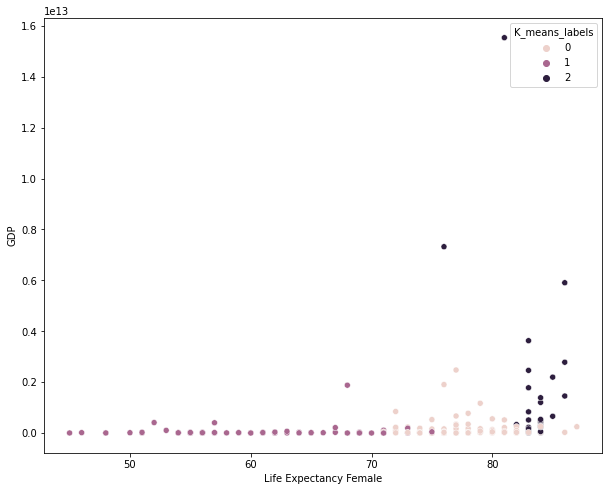

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df1_original['Life Expectancy Female'],y=df1_original['GDP'],hue=df1_original['K_means_labels'])

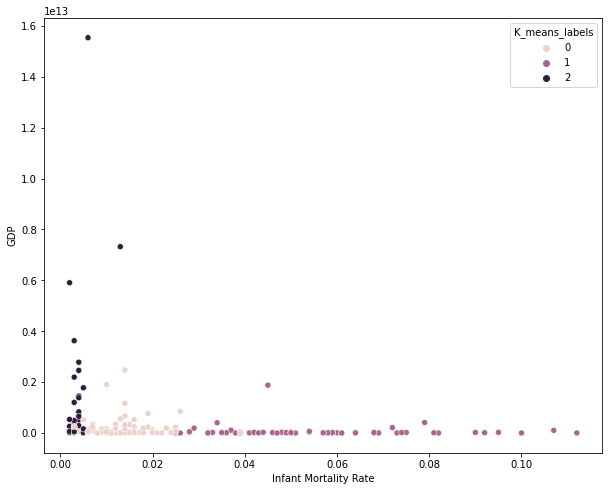

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df1_original['Infant Mortality Rate'],y=df1_original['GDP'],hue=df1_original['K_means_labels'])

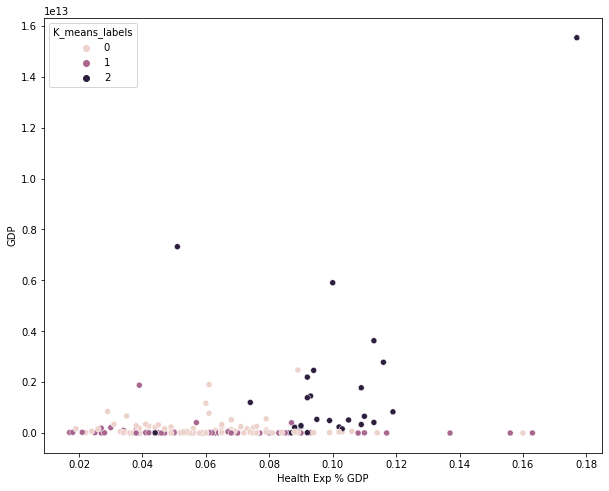

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df1_original['Health Exp % GDP'],y=df1_original['GDP'],hue=df1_original['K_means_labels'])

In [ ]:
print("Countries belonging to cluster 0 are")
data=list(df1_original.groupby('K_means_labels')['Country'].unique()[0])
data

Countries belonging to cluster 0 are


['Algeria',
 'Egypt, Arab Rep.',
 'Libya',
 'Mauritius',
 'Morocco',
 'Seychelles',
 'Tunisia',
 'Armenia',
 'Azerbaijan',
 'Bhutan',
 'Brunei Darussalam',
 'Georgia',
 'Hong Kong SAR, China',
 'Indonesia',
 'Kazakhstan',
 'Korea, Dem. Rep.',
 'Macao SAR, China',
 'Malaysia',
 'Maldives',
 'Mongolia',
 'Philippines',
 'Singapore',
 'Sri Lanka',
 'Thailand',
 'Uzbekistan',
 'Vietnam',
 'Albania',
 'Andorra',
 'Belarus',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Estonia',
 'Faeroe Islands',
 'Hungary',
 'Isle of Man',
 'Kosovo',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Macedonia, FYR',
 'Moldova',
 'Montenegro',
 'Poland',
 'Romania',
 'Russian Federation',
 'San Marino',
 'Serbia',
 'Slovak Republic',
 'Turkey',
 'Ukraine',
 'Bahrain',
 'Iran, Islamic Rep.',
 'Israel',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Oman',
 'Qatar',
 'Saudi Arabia',
 'Syrian Arab Republic',
 'United Arab Emirates',
 'American Samoa',
 'Fiji',
 'French Polynesia',
 'Guam

In [ ]:
print("Countries belonging to cluster 1 are")
data=list(df1_original.groupby('K_means_labels')['Country'].unique()[1])
data

Countries belonging to cluster 1 are


['Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Djibouti',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Gabon',
 'Gambia, The',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Sao Tome and Principe',
 'Senegal',
 'Sierra Leone',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Swaziland',
 'Tanzania',
 'Togo',
 'Uganda',
 'Zambia',
 'Zimbabwe',
 'Afghanistan',
 'Bangladesh',
 'Cambodia',
 'India',
 'Kyrgyz Republic',
 'Lao PDR',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Tajikistan',
 'Timor-Leste',
 'Turkmenistan',
 'Iraq',
 'Yemen, Rep.',
 'Kiribati',
 'Micronesia, Fed. Sts.',
 'Papua New Guinea',
 'Samoa',
 'Solomon Islands',
 'Tonga',
 'Vanuatu',
 'Bolivia',
 'Guatemala',
 'Guyana',
 'Haiti']

In [ ]:
print("Countries belonging to cluster 2 are")
data=list(df1_original.groupby('K_means_labels')['Country'].unique()[2])
data

Countries belonging to cluster 2 are


['China',
 'Japan',
 'Korea, Rep.',
 'Austria',
 'Belgium',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Italy',
 'Luxembourg',
 'Malta',
 'Monaco',
 'Netherlands',
 'Norway',
 'Portugal',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'Australia',
 'New Zealand',
 'Canada',
 'United States']

Math Equations for metrics used:

TP: True Positive
TN: True Negative
FP: False Positive
FN: False Negative
1. Accuracy: (TP + TN)/(TP + TN + FP +FN)

2. F1 Score: (2 * precision * recall)/(precision +recall)
Where;
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)



3. Cohesion

 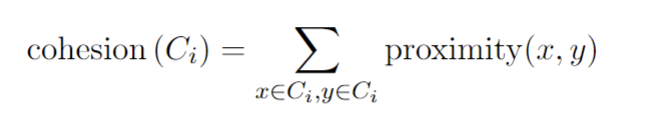


4. Dunn Index

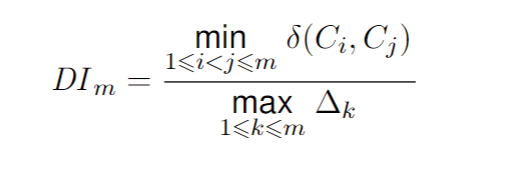


5. Calinski-Harabasz Index

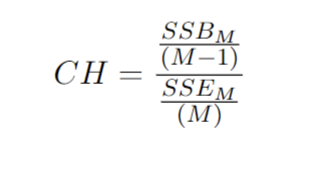

6. Silhouette Coefficient

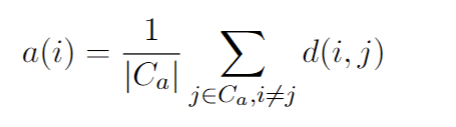


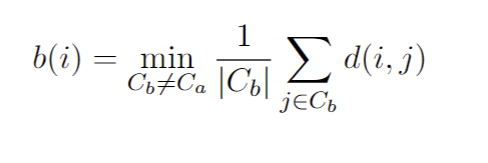


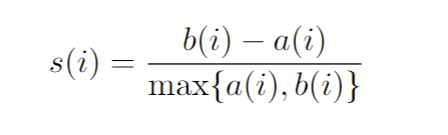